In [1]:
import sys
sys.path.append("../src/")

In [2]:
from datetime import datetime
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
from tdms_io import get_reader_array, get_data_from_array, get_dir_properties, load_xcorr
from visualisation import ts_spectrogram, psd_with_channel_slicing, animated_spectrogram, plot_gps_coords

In [ ]:
dir_path = "../../temp_data_store/FirstData/"
dir_path = "../../../../gpfs/data/DAS_data/Data/"
dir_path = "../../../../gpfs/scratch/gfs19eku/20240205/"
task_t0 = datetime(year = 2024, month = 2, day = 5, 
                   hour = 12, minute = 1, second = 0, microsecond = 0)

properties = get_dir_properties(dir_path)
prepro_para = {
    'cha1': 4000,
    'cha2': 4001,
    'sps': properties.get('SamplingFrequency[Hz]'),
    'spatial_ratio': int(1 / properties.get('SpatialResolution[m]')),          # int(target_spatial_res/spatial_res)
    'n_minute': 4320,
    'freqmax': 49.9,
    'freqmin': 1,
}

reader_array, timestamps = get_reader_array(dir_path)

FileNotFoundError: [Errno 2] No such file or directory: '../../temp_data_store/FirstData/'

In [ ]:
ts_spectrogram(dir_path, prepro_para, task_t0)

In [ ]:
channel_slices = [[1500, 1500], [3000, 3000], [5000, 5000], [7000, 7000]]
psd_with_channel_slicing(reader_array, prepro_para, task_t0, timestamps, channel_slices)

In [ ]:
animated_spectrogram(reader_array, prepro_para, task_t0, timestamps)

In [ ]:
plot_gps_coords('results/linewalk_gps.csv')

### xCorr stuff

/home/harry/miniforge3/envs/seismic/lib/python3.10/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (50.0) of bandpass is at or above Nyquist (50.0). Applying a high-pass instead.
  warnings.warn(msg)


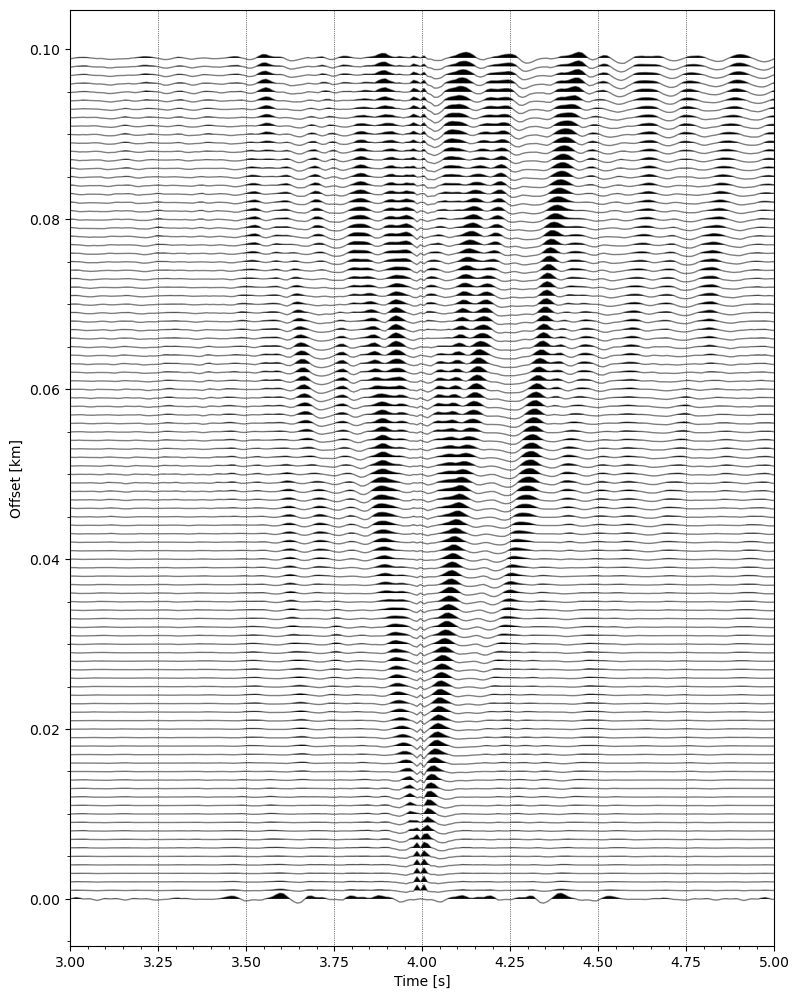

In [11]:
# corr_path = '../results/saved_corrs/2024-02-05 12:01:00_4320mins_f0.01:49.9__3850:8050_1m.txt'
corr_path = '../results/saved_corrs/2024-02-05 12:01:00_4320mins_100f0.01:50.0__4168:4568_1m.txt'
# corr_path = '../results/saved_corrs/2024-02-05 12:01:00_720mins_100f0.01:50.0__3850:5750_1m.txt'
stream = load_xcorr(corr_path, as_stream=True)
fig = plt.figure(figsize=(8, 12))

dx = 1.0
for i in range(0, len(stream)):
    stream[i].stats.distance = i*dx
stream.filter("bandpass", freqmin=0.01, freqmax=50.0)
_ = stream.plot(type='section', fillcolors=('k', None), orientation='horizontal', fig=fig, recordstart=3, recordlength=2)


/home/harry/miniforge3/envs/seismic/lib/python3.10/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (50.0) of bandpass is at or above Nyquist (50.0). Applying a high-pass instead.
  warnings.warn(msg)


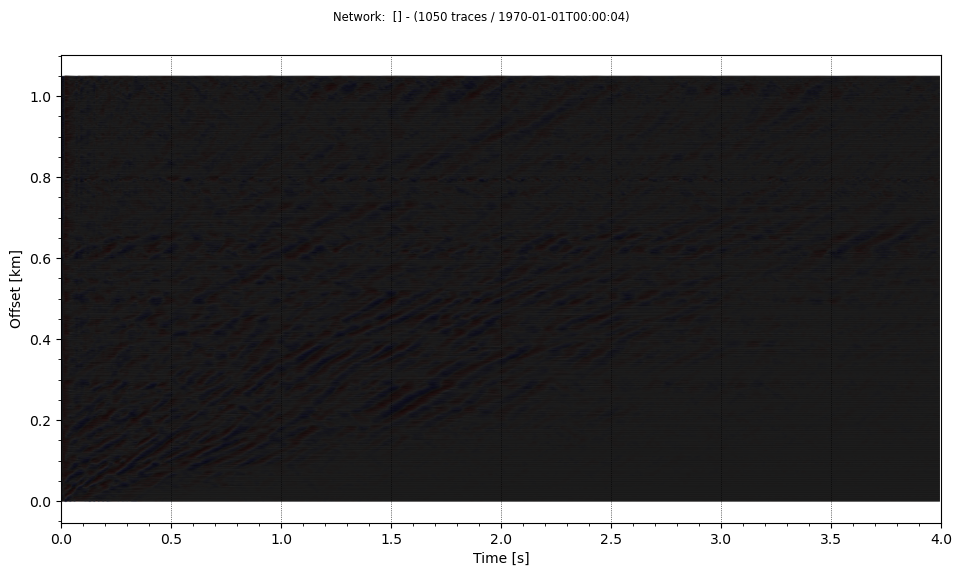

In [18]:
### CAUSAL | ACAUSAL SPLIT
causal = stream.copy()
causal.trim(starttime=UTCDateTime("19700101T00:00:04"))
causal.filter('bandpass', freqmin=0.01, freqmax=50.0)
_ = causal.plot(type='section', recordlength=4, fillcolors=('k', None), orientation='horizontal')

# acausal = stream.copy()
# acausal.trim(endtime=UTCDateTime("19700101T00:00:04"))
# for tr in acausal: tr.data = np.flip(tr.data)
# _ = acausal.plot(type='section', recordlength=4, fillcolors=('k', None), orientation='horizontal')

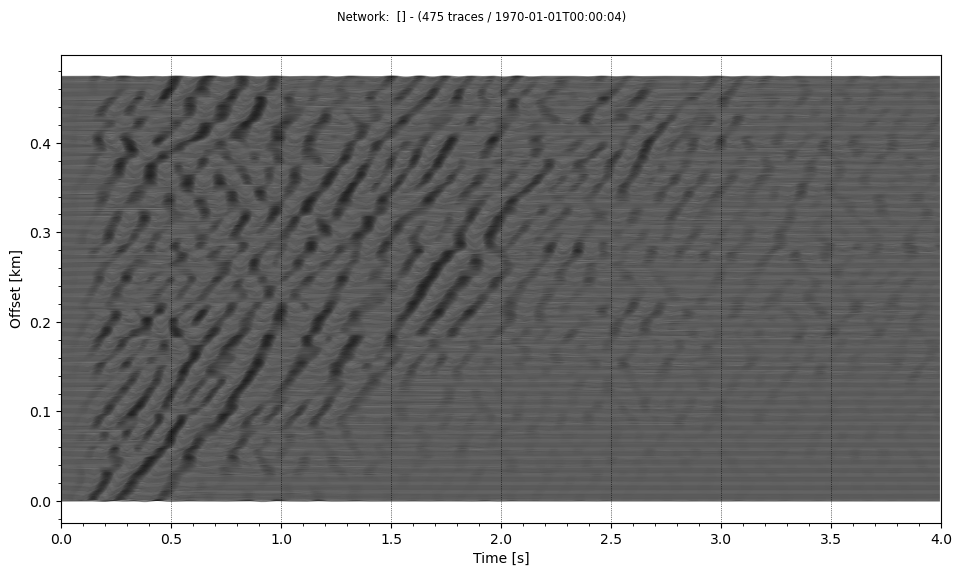

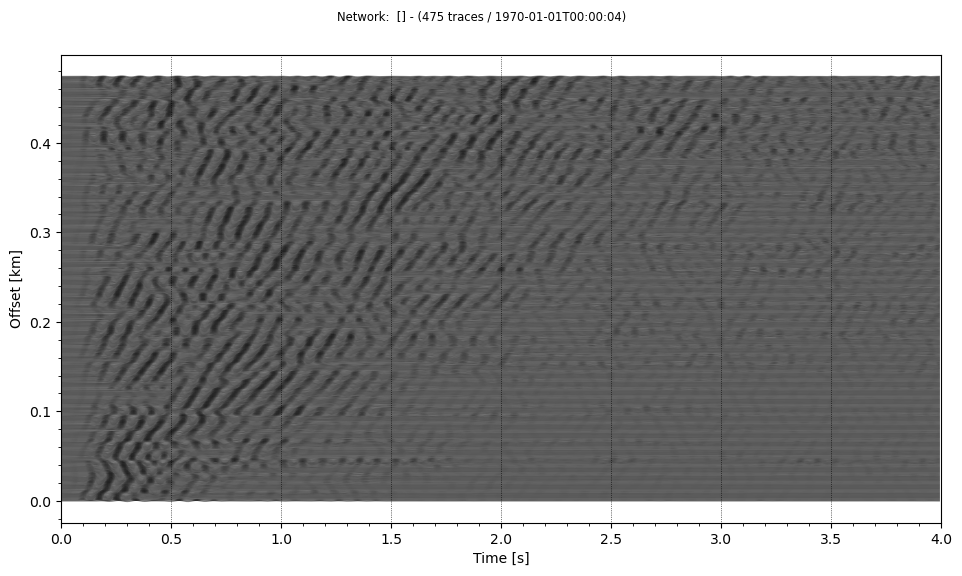

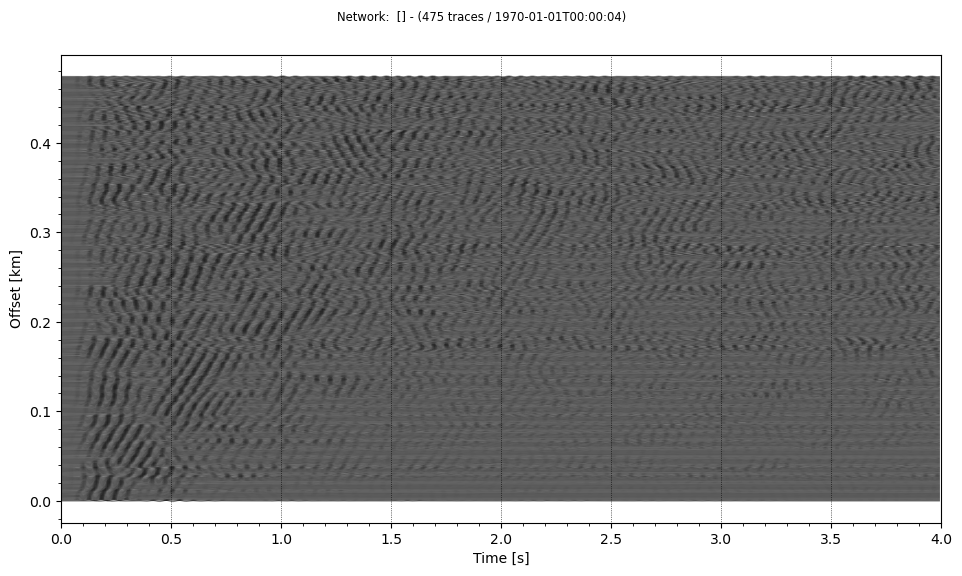

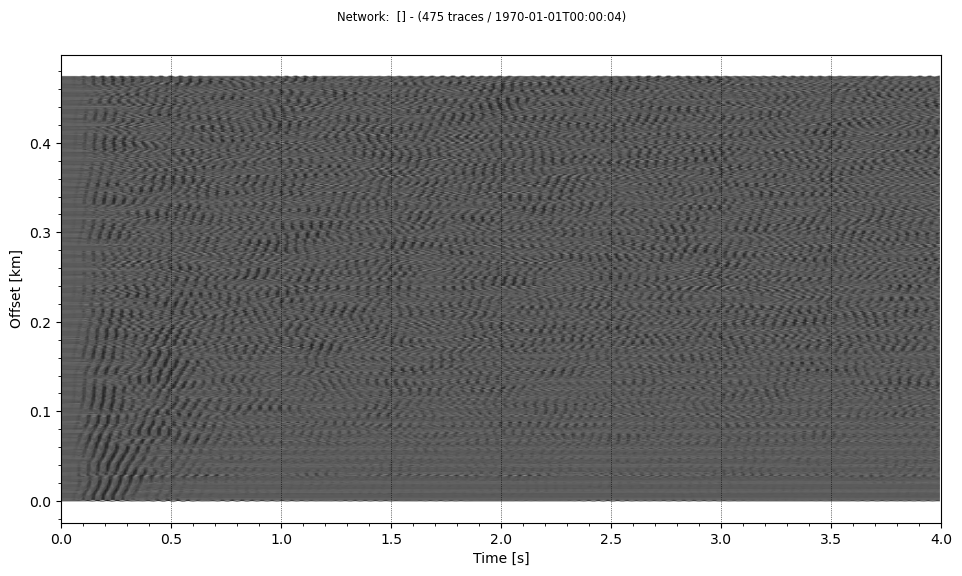

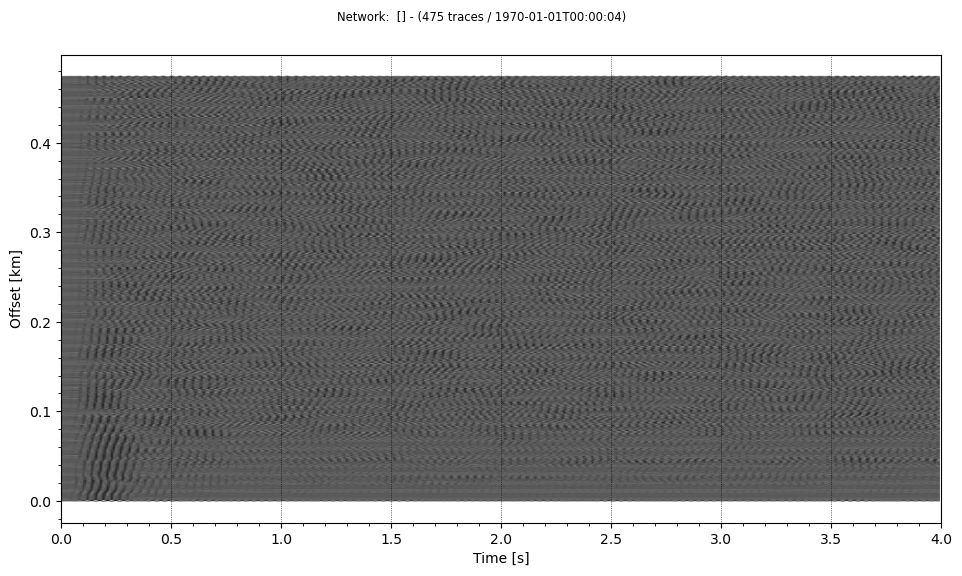

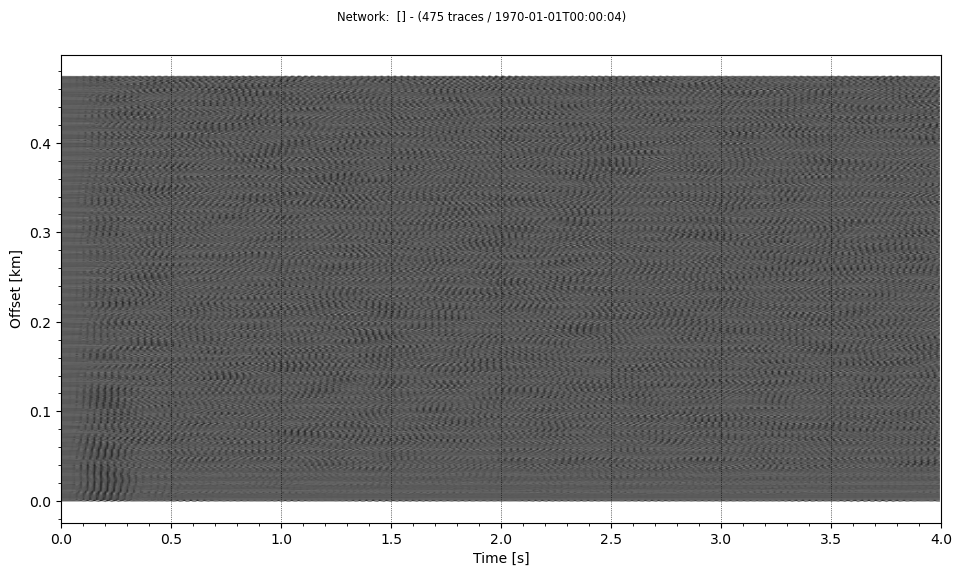

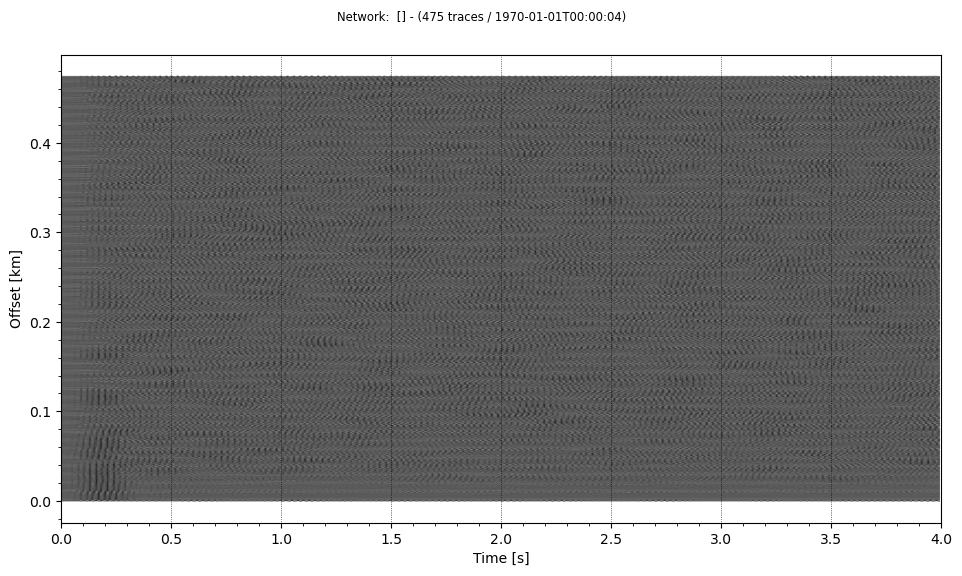

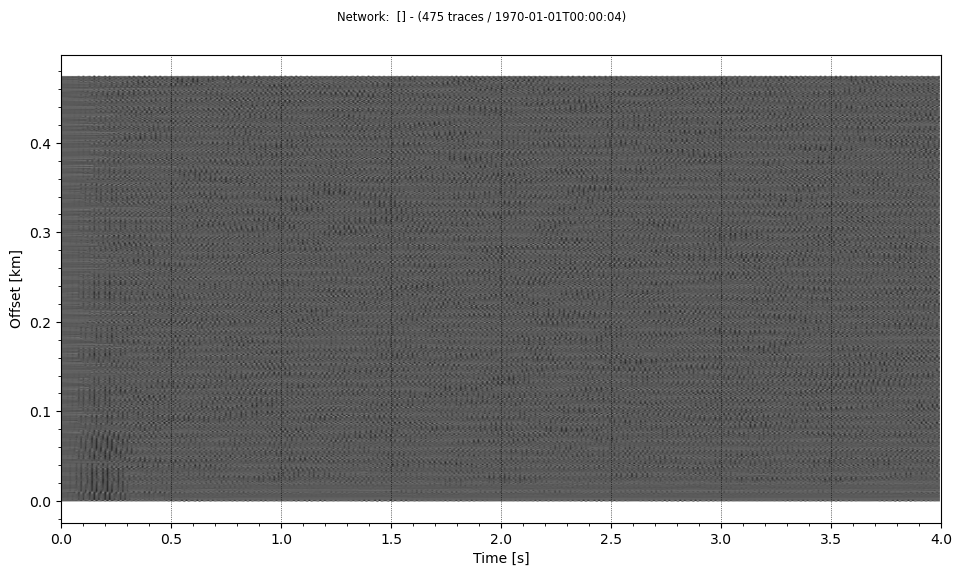

/home/harry/miniforge3/envs/seismic/lib/python3.10/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (50) of bandpass is at or above Nyquist (50.0). Applying a high-pass instead.
  warnings.warn(msg)


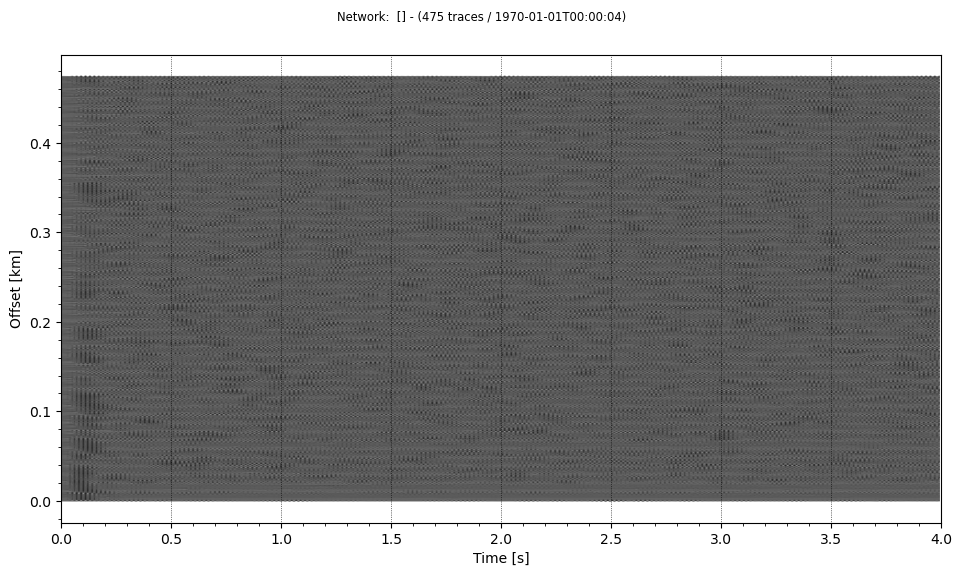

In [ ]:
### throwaway space
for i in np.arange(0, 46, 5):
    causal = stream.copy()
    causal.trim(starttime=UTCDateTime("19700101T00:00:04"))
    causal.filter('bandpass', freqmin=i, freqmax=i+5)
    _ = causal.plot(type='section', recordlength=4, fillcolors=('k', None), orientation='horizontal')